In [1]:
import pandas as pd
import numpy as np

import pandas_datareader as pdr # conda install -c delichon pandas_datareader
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 20, 10 

%matplotlib inline  

strategy_name = "Max/ATR"
data_path = "D:/Data/historical_stock_prices.csv"

E:\Development\Anaconda3\envs\ml\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Load dataset from csv file
data = pd.read_csv(data_path, index_col='date', parse_dates=['date'])

In [3]:
data.head()

,ticker,open,close,adj_close,low,high,volume
date,,,,,,,
2013-05-08,AHH,11.50,11.58,8.493155,11.25,11.68,4633900
2013-05-09,AHH,11.66,11.55,8.471151,11.50,11.66,275800
2013-05-10,AHH,11.55,11.60,8.507822,11.50,11.60,277100
2013-05-13,AHH,11.63,11.65,8.544494,11.55,11.65,147400
2013-05-14,AHH,11.60,11.53,8.456484,11.50,11.60,184100


In [4]:
tickers = data['ticker'].unique()
np.size(tickers)

5685

In [5]:

data.head()

,ticker,open,close,adj_close,low,high,volume
date,,,,,,,
2013-05-08,AHH,11.50,11.58,8.493155,11.25,11.68,4633900
2013-05-09,AHH,11.66,11.55,8.471151,11.50,11.66,275800
2013-05-10,AHH,11.55,11.60,8.507822,11.50,11.60,277100
2013-05-13,AHH,11.63,11.65,8.544494,11.55,11.65,147400
2013-05-14,AHH,11.60,11.53,8.456484,11.50,11.60,184100


In [6]:
# data_amd = data[data['ticker'] =='AMD']

In [7]:
# data_amd_range = data_amd["2016-03-21":"2017-03-21"]

In [8]:
# data_amd_range.head()

In [9]:
# data["2016-11-15":"2016-12-21"][data.ticker == "AMD"][["ticker","close", "ATR", "max", "new_max", "sell"]].tail(100)

In [18]:
class Strategy:
    
    def __init__(self, data, initial_funds = 100, strategy_name = "default"):
        self.name = strategy_name
        self.data = data

class MaxATR(Strategy):

    def run_strategy(self, ticker, start, end, window) :
        data_ticker = self.data[self.data.ticker == ticker]
        data_ticker_range = data_ticker[start:end][["ticker","close"]]

        data_ticker_range["max"] = data_ticker_range["close"].rolling(window=window).max().shift(1).fillna(0)
        data_ticker_range['ATR'] = data_ticker_range['close'].ewm(span = 10).mean()
        data_ticker_range['new_max'] = data_ticker_range["max"].shift(1) < data_ticker_range["max"]
        data_ticker_range['sell'] = data_ticker_range["close"] < data_ticker_range["ATR"]

        data_ticker_range['signal']= False

        # Trade calls
        trade_buy=[]
        trade_sell=[]
        bought=False

        print("Lenght: "+str(len(data_ticker_range))+ " for ticker: " + ticker + " and period: " + start + " to " + end)

        for i in range(len(data_ticker_range)-1):
            if ((data_ticker_range['new_max'].values[i] == True) & (bought == False)):
                print("Trade Call for {row} is Buy.".format(row=data_ticker_range.index[i].date()))
                bought = True;
                trade_buy.append(i)
            elif ((data_ticker_range['sell'].values[i] == True) & (bought == True)):
                print("Trade Call for {row} is Sell.".format(row=data_ticker_range.index[i].date()))
                bought = False;
                trade_sell.append(i)
            data_ticker_range.at[data_ticker_range.index[i],'signal'] = bought
        return data_ticker_range, trade_buy, trade_sell

strategy = MaxATR(data, strategy_name = strategy_name)
data_ticker_range, trade_buy, trade_sell = strategy.run_strategy("AMD", "2015-11-15", "2017-11-21", 100)

Lenght: 509 for ticker: AMD and period: 2015-11-15 to 2017-11-21
Trade Call for 2016-04-12 is Buy.
Trade Call for 2016-04-14 is Sell.
Trade Call for 2016-04-25 is Buy.
Trade Call for 2016-05-12 is Sell.
Trade Call for 2016-05-24 is Buy.
Trade Call for 2016-06-03 is Sell.
Trade Call for 2016-06-17 is Buy.
Trade Call for 2016-06-24 is Sell.
Trade Call for 2016-07-19 is Buy.
Trade Call for 2016-07-21 is Sell.
Trade Call for 2016-07-25 is Buy.
Trade Call for 2016-08-02 is Sell.
Trade Call for 2016-08-19 is Buy.
Trade Call for 2016-09-01 is Sell.
Trade Call for 2016-11-18 is Buy.
Trade Call for 2016-12-01 is Sell.
Trade Call for 2016-12-07 is Buy.
Trade Call for 2017-01-05 is Sell.
Trade Call for 2017-02-03 is Buy.
Trade Call for 2017-02-16 is Sell.
Trade Call for 2017-02-22 is Buy.
Trade Call for 2017-03-02 is Sell.
Trade Call for 2017-07-27 is Buy.
Trade Call for 2017-07-28 is Sell.


In [11]:
data_ticker_range.tail(100)

,ticker,close,max,ATR,new_max,sell,signal
date,,,,,,,
2017-07-03,AMD,12.15,15.20,12.832129,False,True,False
2017-07-05,AMD,13.19,15.20,12.897196,False,False,False
2017-07-06,AMD,13.02,15.20,12.919524,False,False,False
2017-07-07,AMD,13.36,15.20,12.999611,False,False,False
2017-07-10,AMD,13.81,15.20,13.146954,False,False,False
...,...,...,...,...,...,...,...
2017-11-15,AMD,11.07,14.76,11.370533,False,True,False
2017-11-16,AMD,11.25,14.76,11.348618,False,True,False
2017-11-17,AMD,11.38,14.76,11.354324,False,False,False


In [12]:
# data_ticker_range['diff_close'] = data_ticker_range.close.pct_change()

In [36]:
class Metric:
    
    def __init__(self, data, initial_funds = 100, strategy_name = "default"):
        self.name = strategy_name
        self.data = data
        self.data['diff_close'] = data.close.pct_change()
        self.funds = initial_funds
        self.bh_funds = initial_funds

    def calculate_metrics(self, ticker, start, end) :         
        self.data['return'] = self.data.diff_close * self.data.signal.shift(1)
        self.data['funds'] = (self.data['return'] + 1).cumprod() * self.funds   
        print("Funds {funds} ".format(funds=self.data.funds.iloc[-1]))
        self.data['bh_funds'] = (self.data.diff_close +1).cumprod() * self.bh_funds   
        print("Buy & hold funds {bh_funds} ".format(bh_funds=self.data.bh_funds.iloc[-1]))
        

metric = Metric(data_ticker_range, 100, strategy_name)
metric.calculate_metrics("AMD", "2016-11-15", "2016-12-21")

Funds 92.88767520058894 
Buy & hold funds 572.8642996933525 


In [39]:
data_ticker_range["2016-11-15":"2016-12-21"][["ticker","close", "ATR", "max", "new_max", "sell", "signal", 'return', 'funds', 'bh_funds']].head(100)

,ticker,close,ATR,max,new_max,sell,signal,return,funds,bh_funds
date,,,,,,,,,,
2016-11-15,AMD,6.97,6.820624,7.67,False,False,False,0,80.4862,350.251244
2016-11-16,AMD,7.67,6.975056,7.67,False,False,False,0,80.4862,385.427138
2016-11-17,AMD,8.46,7.245046,7.67,False,False,False,0,80.4862,425.125628
2016-11-18,AMD,8.71,7.511401,8.46,True,False,True,0,80.4862,437.688442
2016-11-21,AMD,8.94,7.771146,8.71,True,False,True,0.0264064,82.6115,449.246208
2016-11-22,AMD,8.69,7.938210,8.94,True,False,True,-0.0279642,80.3013,436.683394
2016-11-23,AMD,8.80,8.094899,8.94,False,False,True,0.0126583,81.3178,442.211063
2016-11-25,AMD,8.77,8.217645,8.94,False,False,True,-0.00340906,81.0406,440.703538
2016-11-28,AMD,8.83,8.328982,8.94,False,False,True,0.00684144,81.595,443.718587


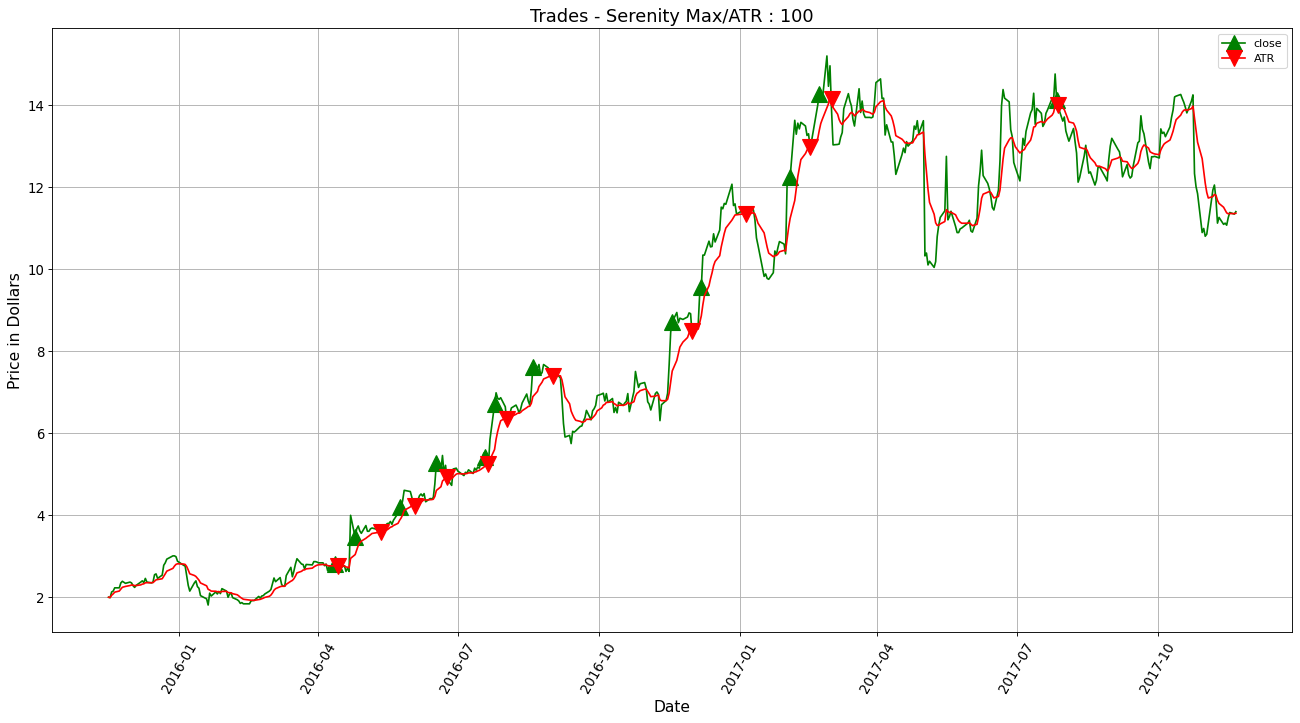

In [42]:
class Plot:
    
#     def __init__(self, data, ticker, start, end, strategy_name = "default"):
    def __init__(self, data, ticker, strategy_name = "default"):
        self.name = strategy_name
        self.ticker = ticker
        self.data = data
        
    def plot_signals(self, trade_buy, trade_sell):

    #     data_ticker_range = data[start:end][["ticker","close", "ATR"]]

        plt.figure(figsize=(20, 10),dpi=80)
        plt.plot(self.data.index, self.data['close'],'-^', markevery=trade_buy, ms=15, color='green')
        plt.plot(self.data.index, self.data['ATR'],'-v', markevery=trade_sell, ms=15, color='red')
        plt.xlabel('Date',fontsize=14)
        plt.ylabel('Price in Dollars', fontsize = 14)
        plt.xticks(rotation='60',fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('Trades - '+str(self.name)+' : '+str(self.ticker), fontsize = 16)
        plt.legend(['close','ATR'])
        plt.grid()
        plt.show() 
    
# plot_range(data_ticker_range, "Serenity Max/ATR", "AMD", "2016-11-15", "2017-12-21")
plot = Plot(data_ticker_range, 100, strategy_name)
plot.plot_signals(trade_buy, trade_sell)

In [ ]:
data_range = ["2016-11-15":"2016-12-21"][["ticker","close", "ATR", "max", "new_max", "sell", "signal", 'funds']]